In [1]:
import pandas as pd
import pandas_datareader as web
from datetime import datetime, timedelta
DateFormat = "%Y-%m-%d"
today = datetime.now().strftime(DateFormat)
today

'2021-02-10'

In [2]:
# get number of days earlier
hqDays = 60
startDate = (datetime.now() + timedelta(days=-hqDays)).strftime(DateFormat)
startDate

'2020-12-12'

In [3]:
# download hq data
symbol = 'ATHX'
df = web.DataReader(symbol, data_source="yahoo", start=startDate, end=today)

In [4]:
#df.reindex(datetime.strptime(df.index, DateFormat))
#df.index

In [10]:
# add columns from 1 day earlier row
df['PrvClose'] = df.Close.shift(1)
df['PrvLow'] = df.Low.shift(1)
df['LowSlope'] = (df.Low - df.PrvLow) / df.PrvLow
df.tail(3)

,High,Low,Open,Close,Volume,Adj Close,PrvClose,PrvLow,LowSlope
Date,,,,,,,,,
2021-02-08,2.82,2.6200,2.75,2.77,4267400,2.77,2.72,2.67,-0.018727
2021-02-09,2.83,2.7100,2.81,2.76,3004100,2.76,2.77,2.62,0.034351
2021-02-10,2.92,2.6095,2.76,2.72,2968266,2.72,2.76,2.71,-0.037085


In [6]:
# pandas built-in plot
#df.LowSlope.plot()

In [7]:
# use matplotlib
import matplotlib.pyplot as plt

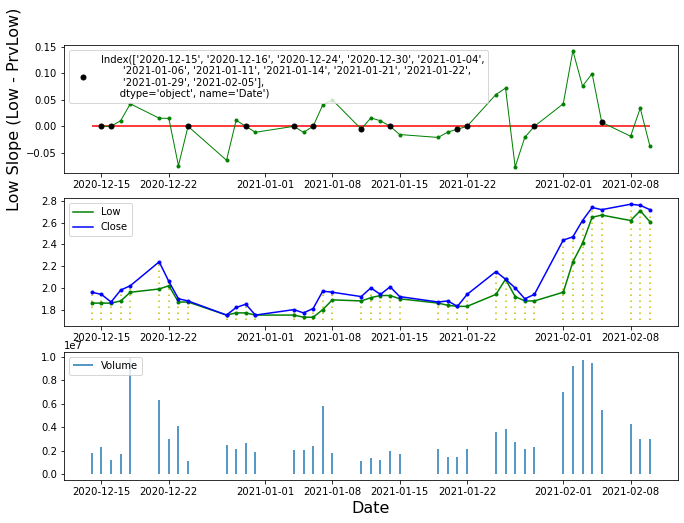

In [12]:
plt.figure(figsize=[11, 8]) # width and height in inches
plt.title('Low Slope List', fontsize=18)

plt.subplot(311)
#plt.plot(range(df.shape[0]), df.LowSlope, 'g', linewidth=1)
#plt.hlines(0, 0, df.shape[0], colors='r')
plt.plot(df.LowSlope, color='g', linewidth=1)
plt.plot(df.LowSlope, 'go', markersize=3)
plt.hlines(0, df.index[0], df.index[df.shape[0]-1], colors='r')

#markerData = df.LowSlope[df.LowSlope.isin([0])] # marker where slope = 0
markerData = df.LowSlope[abs(df.LowSlope) < 0.01] # marker where slope = 0
plt.plot(markerData, 'ko', markersize=5, label="%s" % markerData.index.strftime(DateFormat))
plt.legend(loc='best')
plt.ylabel('Low Slope (Low - PrvLow)', fontsize=16)

plt.subplot(312)
plt.plot(df.Low, color='g', label="Low")
plt.plot(df.Low, 'go', markersize=3)
plt.plot(df.Close, color='b', label="Close")
plt.plot(df.Close, 'bo', markersize=3)
plt.vlines(df.index, 1.7, df.Close, color="y", linestyle=(0, (1, 3)))#'dotted')
plt.legend(loc='best')

plt.subplot(313)
plt.vlines(df.index, 1000, df.Volume, label="Volume")
plt.legend(loc='upper left')

plt.xlabel('Date', fontsize=16)
plt.show()

In [18]:
# low low but high close
df[(df.LowSlope < 0) & (df.Close > df.PrvClose)]

,High,Low,Open,Close,Volume,Adj Close,PrvClose,PrvLow,LowSlope
Date,,,,,,,,,
2021-01-20,1.91,1.84,1.91,1.88,1435800,1.88,1.87,1.86,-0.010753
2021-02-08,2.82,2.62,2.75,2.77,4267400,2.77,2.72,2.67,-0.018727
